# Monad 

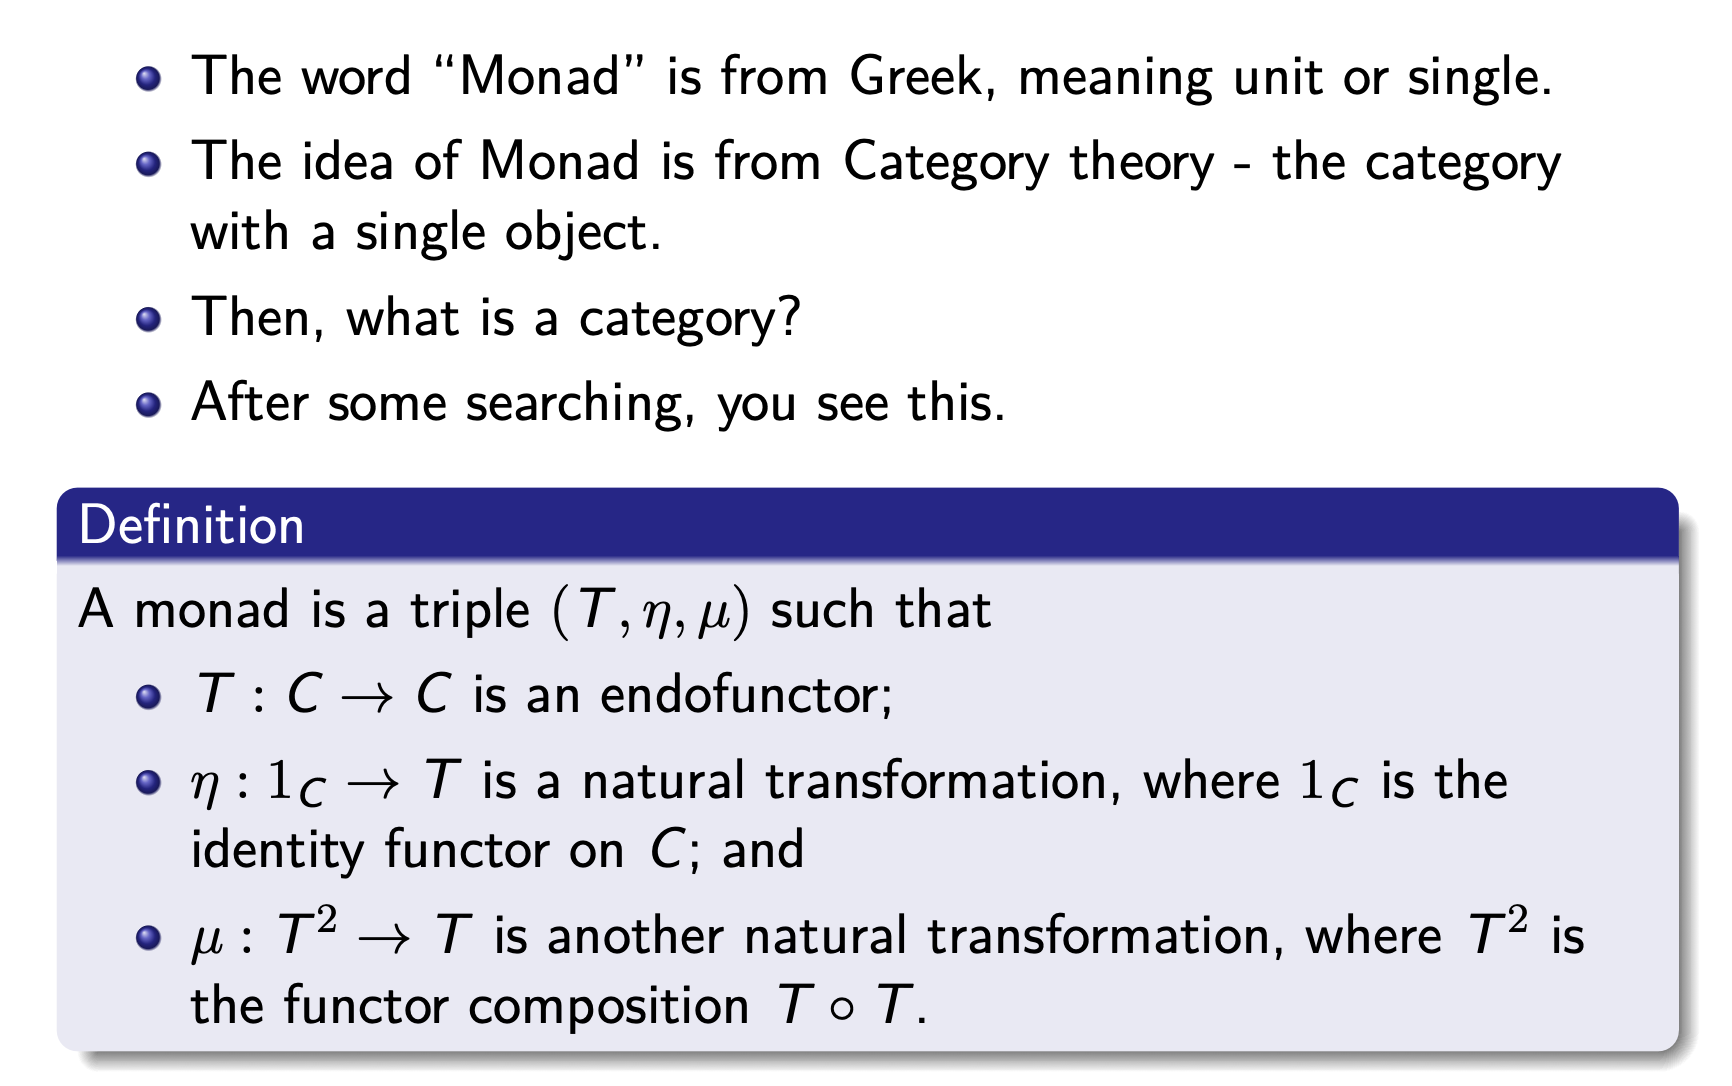

- Monad has many useful applications in functional programming.
    - Maybe - Partial Functions
    - Either - Error Handling
    - List - Nondeterministic Computing
    - State - Mutability Writer - Function Logging
    - Promises - Concurrency

# Maybe

In [3]:
let ( / ) x y=
  if y = 0 then None
  else Some (x/y);;

val ( / ) : int -> int -> int option = <fun>


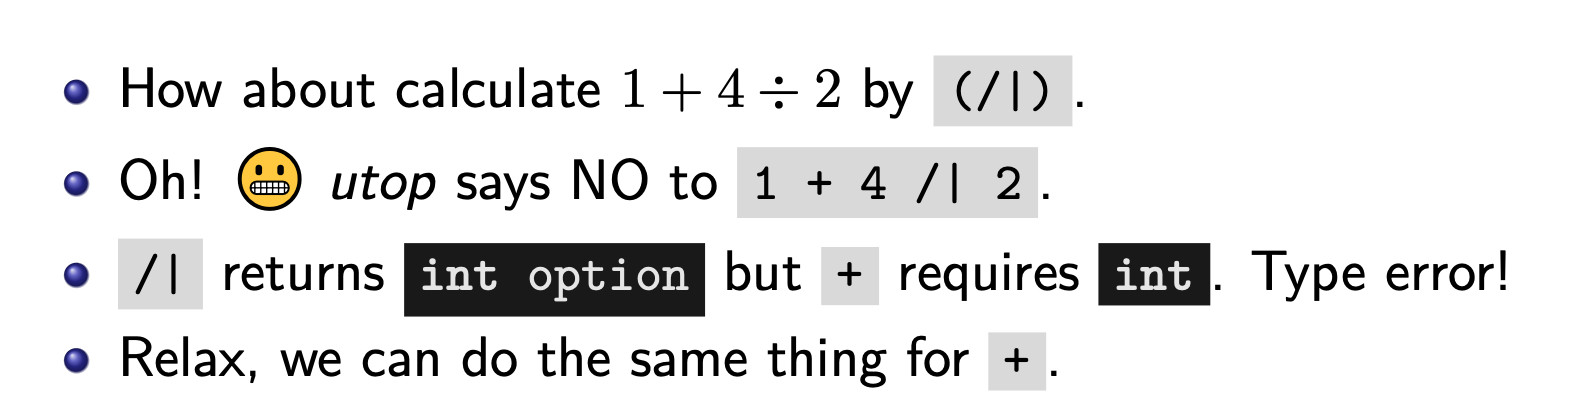

In [4]:
let ( +| ) x y =
  match x, y with
| None, _ | _, None -> None
| Some a, Some b -> Some (a + b);;

let (/|) x y =
  match x, y with
| None, _ | _, None | _, Some 0 -> None
| Some a, Some b -> Some (a / b);;

let ( * ) x y =
  match x, y with
| None, _ | _, None -> None
| Some a, Some b -> Some (a * b);;


val ( +| ) : int option -> int option -> int option = <fun>


val ( /| ) : int option -> int option -> int option option = <fun>


val ( * ) : int option -> int option -> int option = <fun>


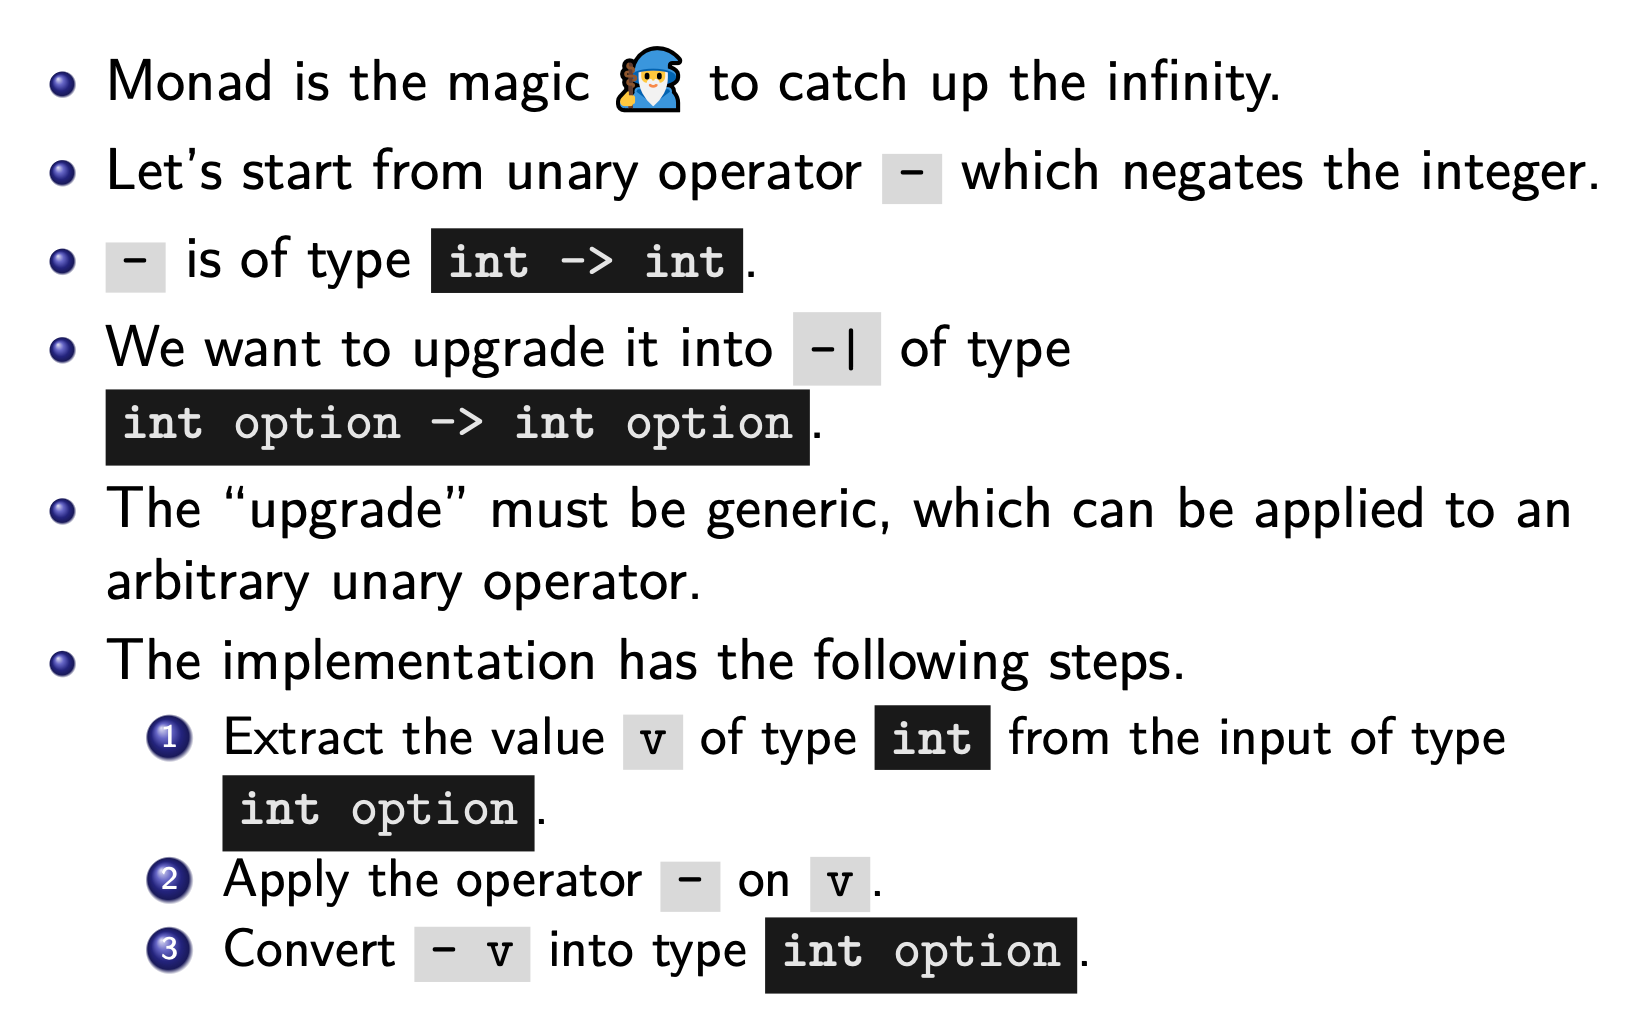

In [5]:
module type Monad = sig
  type 'a t 
  val return : 'a -> 'a t
  val ( >>= ): 'a t -> ('a -> 'b t) -> 'b t (*bind*)
end;;

module type Monad =
  sig
    type 'a t
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


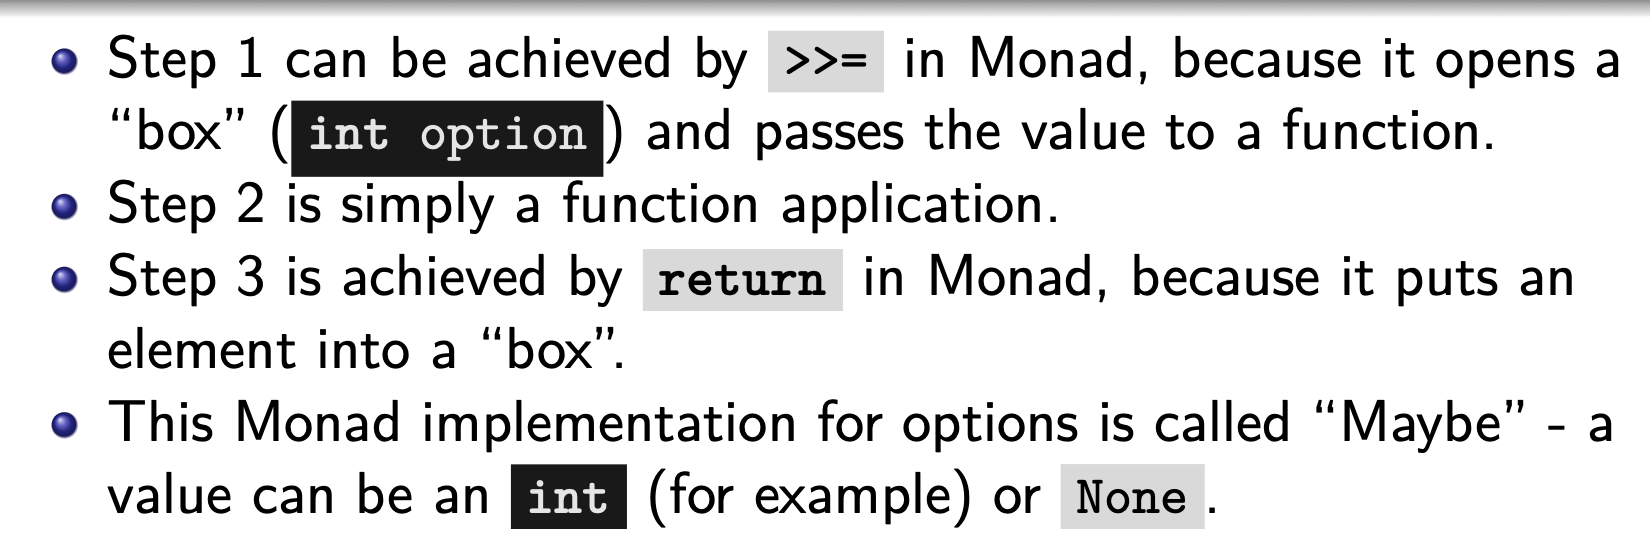

In [ ]:
module Maybe : Monad with
  type 'a t = 'a option = struct
  type 'a t = 'a option
  let return x = Some x
  exception Undefined
  let ( >>= ) x f =
    match x with
    | None -> raise Undefined
    | Some a -> f a
end;;



module Maybe :
  sig
    type 'a t = 'a option
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


In [7]:
open Maybe;;
let return_unary op x = return (op x);;
let upgrade_unary op x = x >>= fun a -> return_unary op a;;

let ( -| ) = upgrade_unary ( - );;

val return_unary : ('a -> 'b) -> 'a -> 'b Maybe.t = <fun>


val upgrade_unary : ('a -> 'b) -> 'a Maybe.t -> 'b Maybe.t = <fun>


val ( -| ) : int Maybe.t -> (int -> int) Maybe.t = <fun>


In [8]:
let return_binary op x y = return (op x y);;

let upgrade_binary op x y =
  x >>= (fun a -> 
  y >>= (fun b-> return_binary op a b));;

val return_binary : ('a -> 'b -> 'c) -> 'a -> 'b -> 'c Maybe.t = <fun>


val upgrade_binary :
  ('a -> 'b -> 'c) -> 'a Maybe.t -> 'b Maybe.t -> 'c Maybe.t = <fun>


# Writer 

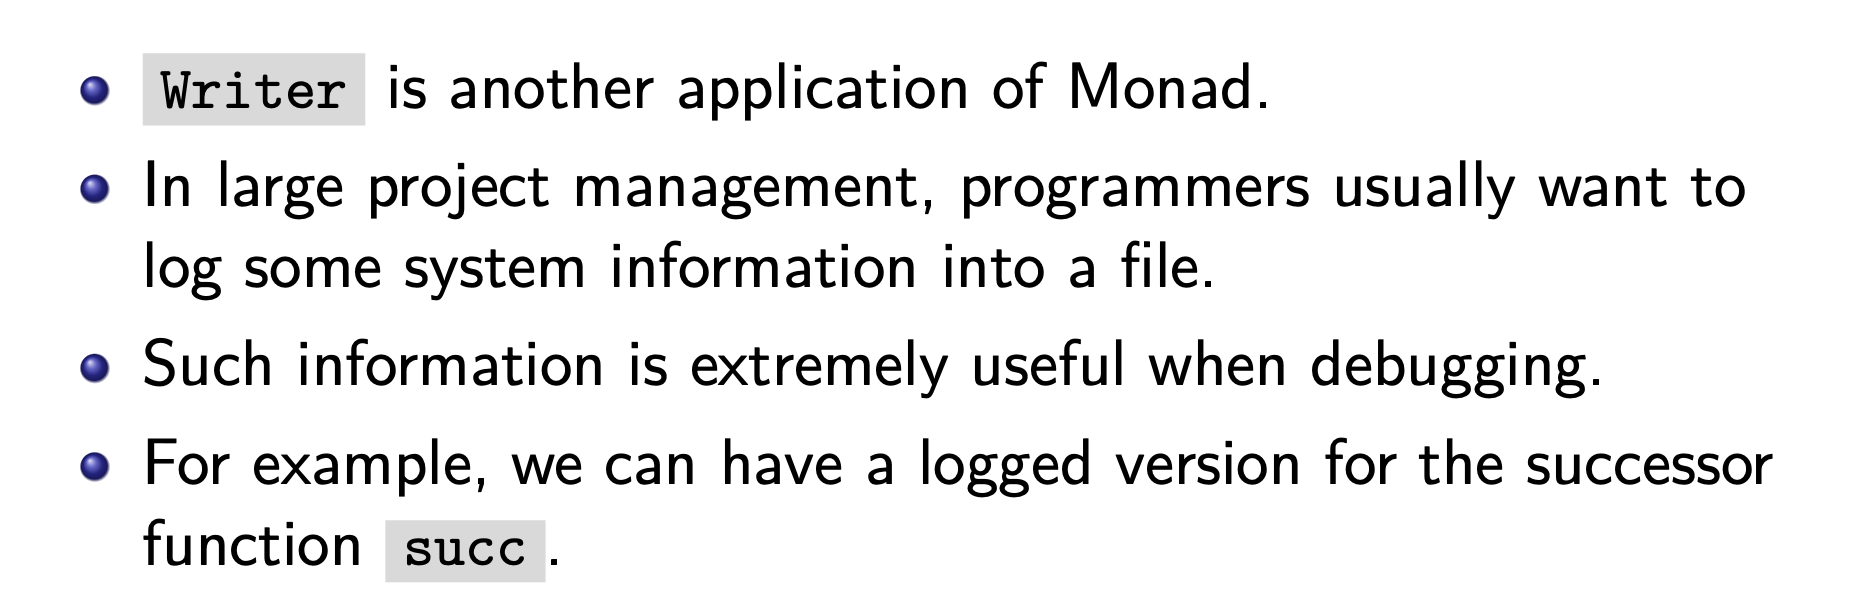

In [9]:
let succ x = x + 1;;
let succ_log x = (succ x, Printf.sprintf "Called successor on %i;" x);;

val succ : int -> int = <fun>


val succ_log : int -> int * string = <fun>


In [10]:
let succ_log_comp = function
| ( value, log) -> ( succ value, log^Printf.sprintf " Called successor on %i;" value);;

val succ_log_comp : int * string -> int * string = <fun>


In [11]:

module Writer : Monad with 
  type 'a t = 'a * string 
  = struct
  type 'a t = 'a * string
  let return x = (x, "")
  let (>>=) p op =
  match p with
  | (v1, l1) -> begin
    match op v1 with
  | (v2, l2) -> (v2, l1 ^ l2)
  end
end;;


module Writer : Monad with
  type 'a t = 'a * string
  = struct
  type 'a t = 'a * string
  let return x = (x, "")
  let ( >>= ) p op =
    let (v1, l1) = p in
      let (v2, l2) = op v1 in 
      (v2, l1 ^ l2)
end;;

module Writer :
  sig
    type 'a t = 'a * string
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


module Writer :
  sig
    type 'a t = 'a * string
    val return : 'a -> 'a t
    val ( >>= ) : 'a t -> ('a -> 'b t) -> 'b t
  end


In [12]:
open Writer;;
let log name op v = (op v, Printf.sprintf "Called %s on %i; " name v);;

let loggable name op p = p >>= (fun a -> log name op a);;

let suc_log = loggable "succ" succ;;

(return 1) |> suc_log |> suc_log;;


val log : string -> (int -> 'a) -> int -> 'a * string = <fun>


val loggable : string -> (int -> 'a) -> int Writer.t -> 'a Writer.t = <fun>


val suc_log : int Writer.t -> int Writer.t = <fun>


- : int Writer.t = (3, "Called succ on 1; Called succ on 2; ")


In [13]:
let compose f g x = (f x) >>= g;;

val compose : ('a -> 'b Writer.t) -> ('b -> 'c Writer.t) -> 'a -> 'c Writer.t =
  <fun>


In [15]:
type nat = O | S of nat;;
let suc x = S x;;
let pred = function
|O -> None
|S x -> Some x;;
open Maybe;;

let compose f g x = (f x) >>= g;;
(*Test composition on pred.*)
compose pred pred (S O);;
(*Should raise exception Undefined.*)

type nat = O | S of nat


val suc : nat -> nat = <fun>


val pred : nat -> nat option = <fun>


val compose : ('a -> 'b Maybe.t) -> ('b -> 'c Maybe.t) -> 'a -> 'c Maybe.t =
  <fun>


- : nat Maybe.t = None
